In [1]:
# import libraries
import pandas as pd
from matplotlib import pyplot as plt

COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR

%matplotlib inline

In [2]:
# Create dataframe from dataset
df = pd.read_csv("../datasets/test.csv")

### Indicator 2.1: You (re-)validate data after model generated assumptions

<font color='blue'>
    
* Create suitable statistical summaries for each of the variables
* Visualise the distribution of the variables, with special attention for the target
* Discuss the data quality and how it impacts your model</font><font color='red'>
* Look up the assumptions of the model you want to apply
* Investigate potential sources of selection bias in your dataset
* Discuss whether your rows really are independent observations
* Try to name the distributions of your numeric variables
* Find and interpret correlations in your dataset
</font>

### Indicator 2.1 answers
1. 

In [3]:
df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


2. 

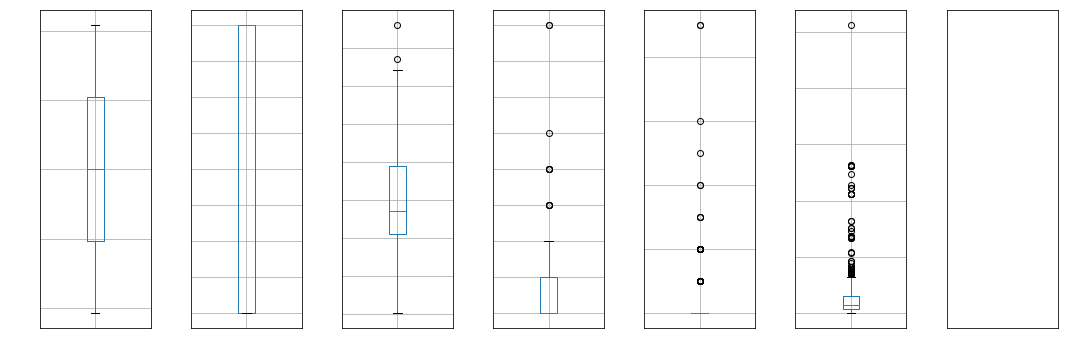

In [4]:
fig, axes = plt.subplots(nrows=1, ncols=7, figsize=(15, 5))

for ax, column in enumerate(df.describe().columns):
    df.boxplot(column=column, ax=axes[ax])

plt.tight_layout()

3. There seems to be a lot of missing data that could be useful to use to make more accurate predictions. 

### Indicator 2.2: You integrate relevant data by merging multiple data sources

<font color='red'>
What would be needed to merge additional data sources?
</font>

1. A column to merge the datasets on.

### Indicator 2.3: You clean data by imputating and scaling revelant data

<font color='blue'>
    
* Discuss the consequences of omitting rows and colums with missing data</font><font color='red'>
* Discuss missing data mechanisms
* Discuss the opportunities for imputing and how they impact the model</font><font color='blue'>
* Decide how you will hande missing data
* Compare the distributions of numerical variables: is scaling relevant?</font><font color='red'>
* Discuss different scaling techniques, in relation to your model
* Decide about scaling
</font>

### Indicator 2.3 answers


### Indicator 2.4: You construct data by one-hot-encoding, defining targets and labeling relevant data

<font color='blue'>
    
* Create a new variable family_size by adding siblings/ spouses and parents/ children
* Extract at least two properties from the cabin variable</font><font color='red'>
* Create one-hot-encoded (dummy) columns for variables that are not numeric</font><font color='blue'>
* EXTRA challenge: read your data without pandas (csv, xlrd, sql, …) and do all the parsing yourself
</font>

In [5]:
# Create family_size column. Adding the SibSp and Parch column togetherz
df["family_size"] = df["SibSp"] + df["Parch"]

# Extract two properties from the Cabin column
# Extract the amount of cabins someone has on his/her name
df.loc[df['Cabin'].notna(), 'cabin_amount'] = [len(row) for row in df.loc[df['Cabin'].notna(), 'Cabin'].str.split(' ')]

# Extract the deck letter from the full cabin name
df.loc[df['Cabin'].notna(), 'cabin_deck'] = [row[-1][0] for row in df.loc[df['Cabin'].notna(), 'Cabin'].str.split(' ')]

# Extract the cabin numbers from the cabin names
df.loc[df['Cabin'].notna(), 'cabin_number'] = [','.join([number[1:] for number in row]) for row in df.loc[df['Cabin'].notna(), 'Cabin'].str.split(' ')]

#
df["Survived"] = df["Sex"].map({"female" : 1, "male" : 0})

# One-hot-encoding


df.to_csv("../datasets/test2.csv", index = False)

### Indicator 2.5: You convert data formats as prerequisite for relevant model technique(

<font color='blue'>
    
* Visualize relations between the target and other variables
* Discuss the type of model that you need
* Calculate a simple benchmark: look at the most common outcome (Survived) for Sex=female and Sex=male. Based on that, create predictions for the test set and upload your first submission
</font>

In [6]:
df = pd.read_csv("../datasets/test2.csv")

df.corr()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,family_size,cabin_amount,Survived
PassengerId,1.000000,-0.026751,-0.034102,0.003818,0.043080,0.008211,0.030087,-0.128647,-0.023245
Pclass,-0.026751,1.000000,-0.492143,0.001087,0.018721,-0.577147,0.012736,0.050987,-0.108615
Age,-0.034102,-0.492143,1.000000,-0.091587,-0.061249,0.337932,-0.093632,0.101826,-0.000013
SibSp,0.003818,0.001087,-0.091587,1.000000,0.306895,0.171539,0.788610,0.236895,0.099943
Parch,0.043080,0.018721,-0.061249,0.306895,1.000000,0.230046,0.827242,0.547856,0.159120
Fare,0.008211,-0.577147,0.337932,0.171539,0.230046,1.000000,0.249924,0.568137,0.191514
family_size,0.030087,0.012736,-0.093632,0.788610,0.827242,0.249924,1.000000,0.517608,0.161803
cabin_amount,-0.128647,0.050987,0.101826,0.236895,0.547856,0.568137,0.517608,1.000000,-0.001718
Survived,-0.023245,-0.108615,-0.000013,0.099943,0.159120,0.191514,0.161803,-0.001718,1.000000


In [13]:
output = pd.DataFrame({'PassengerId': df.PassengerId, 'Survived': df.Survived})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
